<a href="https://colab.research.google.com/github/SantiM01/Senior-Project/blob/main/Game_by_game_touchdown_Model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# File paths
file_paths = {
    "Linear Regression": "qb_linear_recursive_pass_rush_total_td_predictions.csv",
    ######################### Random Forrest 3 is the best
    "Random Forest": "qb_results_random_forrest_xgboost_recursive_pass_rush_total_td_predictions.csv",
    "Dummy Model": "qb_dummy_model_results_pass_rush_total_td.csv",
}

# Load the data into dictionaries
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display the first few rows of each file to understand their structure
data_preview = {model: df.head() for model, df in dataframes.items()}
data_preview


{'Linear Regression':    QB ID  pass_td_per_game MAE  pass_td_per_game MSE  pass_td_per_game R²  \
 0    865              1.156318              1.739819            -9.873870   
 1   3739              0.915065              1.046266            -0.634790   
 2   4161              1.007728              1.400262            -2.182414   
 3  20245              1.070325              1.603877            -4.145109   
 4  20531              1.178943              2.001709            -0.331330   
 
                pass_td_per_game Predicted Next Games  \
 0  [np.float64(-1.6588405812295735), np.float64(-...   
 1  [np.float64(0.9467532467532482), np.float64(0....   
 2  [np.float64(2.048829573614808), np.float64(2.0...   
 3  [np.float64(1.1316623284688925), np.float64(1....   
 4  [np.float64(1.9090909090909096), np.float64(1....   
 
                        pass_td_per_game Coefficients  rush_td_per_game MAE  \
 0  {'temp': np.float64(-0.047722888534764855), 'w...              0.000000   
 1  {'t

In [ ]:
####################################
#
#         Pass touchdown
#
#####################################

import pandas as pd

# Assuming you've already loaded your dataframes as shown previously

# Calculate the mean MAE for each model
# Changed 'MAE' to 'Mean Absolute Error' for the Dummy Model
mean_mae = {
    model: df["pass_td_per_game MAE"].mean() #if model != "Dummy Model" else df["Mean Absolute Error"].mean()
    for model, df in dataframes.items()
}

# Display the mean MAE for each model
mean_mae

{'Linear Regression': np.float64(1.2718693738493794),
 'Random Forest': np.float64(0.7918359045886515),
 'Dummy Model': np.float64(0.8812012965781711)}

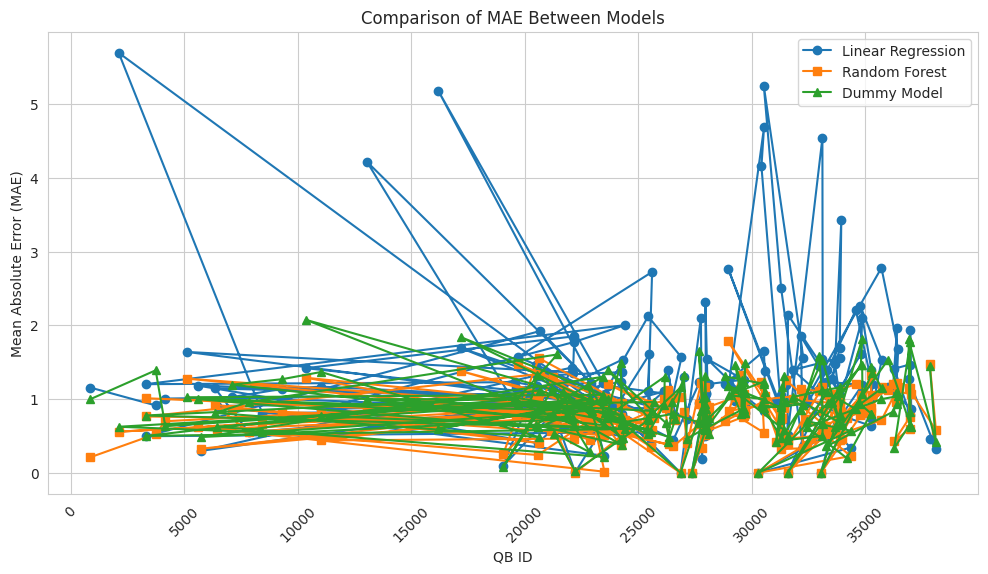

In [ ]:
import matplotlib.pyplot as plt

# Extract QB IDs and MAE values
mae_data = pd.DataFrame({
    "QB ID": dataframes["Linear Regression"]["QB ID"],
    "Linear Regression": dataframes["Linear Regression"]["pass_td_per_game MAE"],
    "Random Forest": dataframes["Random Forest"]["pass_td_per_game MAE"],
    "Dummy Model": dataframes["Dummy Model"]["pass_td_per_game MAE"],
})

# Plot the MAE values for each model
plt.figure(figsize=(12, 6))
plt.plot(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", marker='o', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", marker='s', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", marker='^', linestyle='-')

plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Between Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


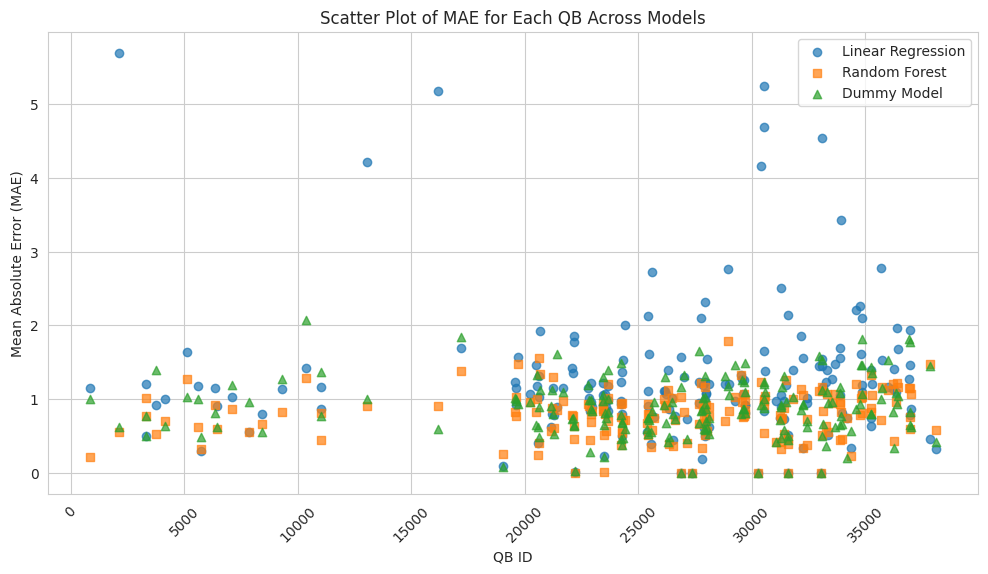

In [ ]:
# Create a scatter plot for MAE comparison
plt.figure(figsize=(12, 6))

plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", alpha=0.7, marker='o')
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", alpha=0.7, marker='s')
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", alpha=0.7, marker='^')

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


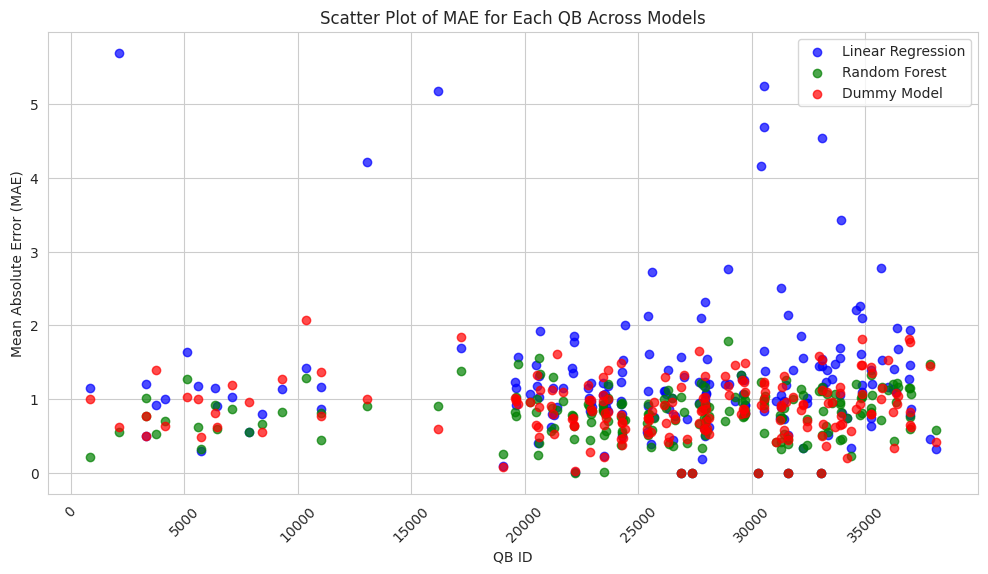

In [ ]:
# Create a scatter plot for MAE comparison with different colors
plt.figure(figsize=(12, 6))

# Define colors for each model
colors = {"Linear Regression": "blue", "Random Forest": "green", "Dummy Model": "red"}

# Scatter plot with different colored dots
plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], color=colors["Linear Regression"], alpha=0.7, marker='o', label="Linear Regression")
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], color=colors["Random Forest"], alpha=0.7, marker='o', label="Random Forest")
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], color=colors["Dummy Model"], alpha=0.7, marker='o', label="Dummy Model")

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

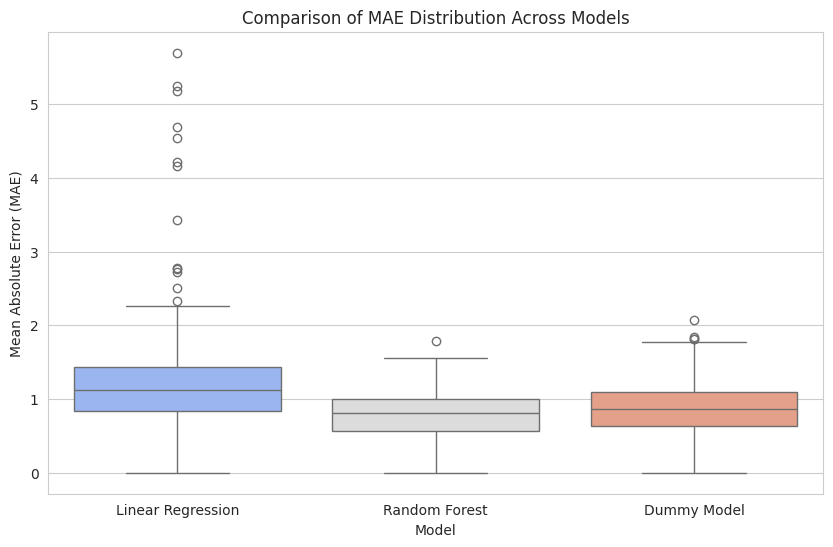

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Convert data to long format for seaborn
mae_long = mae_data.melt(id_vars=["QB ID"], var_name="Model", value_name="MAE")

# Create a boxplot to visualize the distribution of MAE across models (Fixed Version)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mae_long, x="Model", y="MAE", hue="Model", palette="coolwarm")
#plt.legend().remove()  # Remove duplicate legend

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Distribution Across Models")

plt.show()


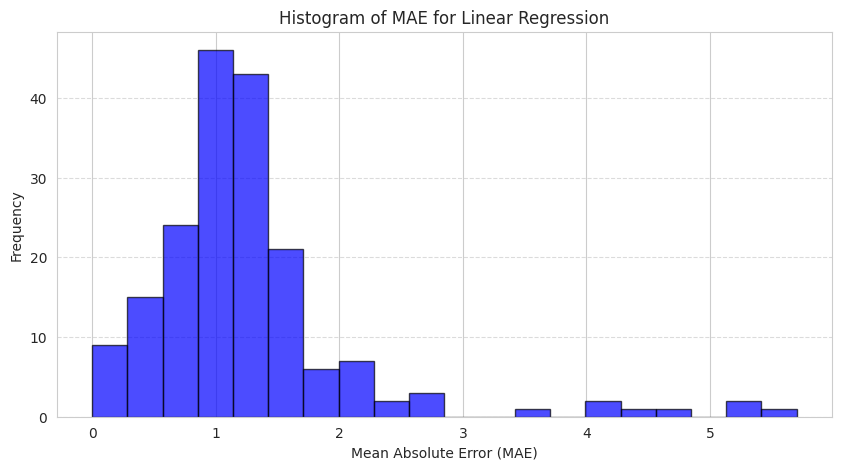

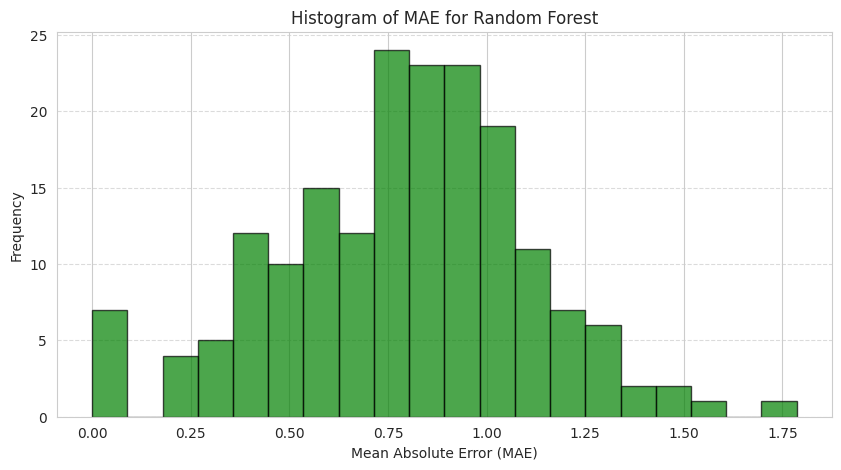

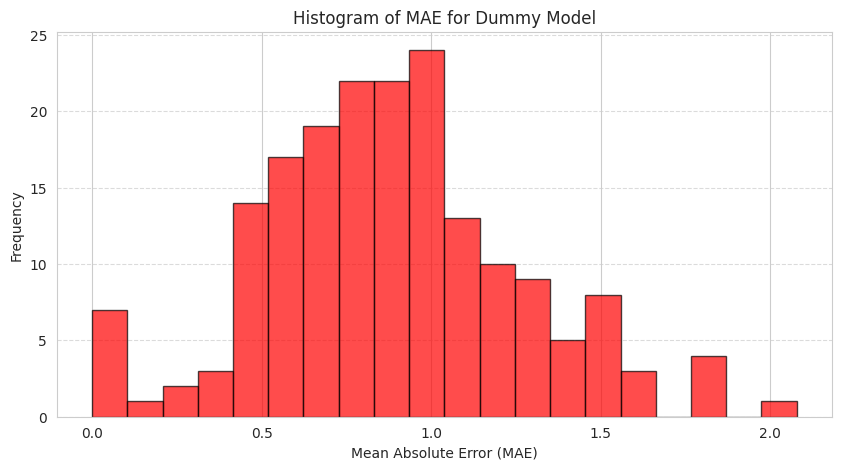

In [ ]:
# Create individual histograms for each model

# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=20, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=20, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=20, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


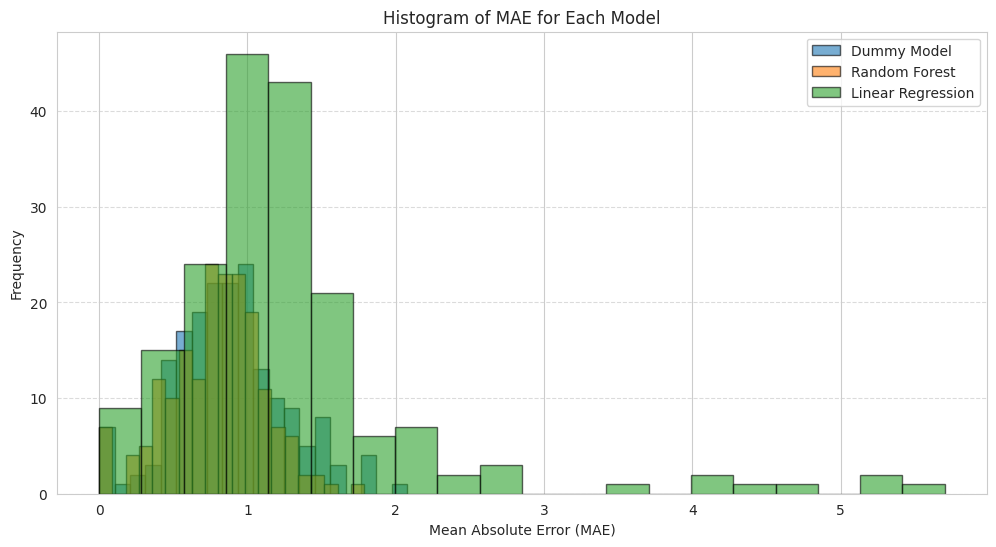

In [ ]:
# Plot individual histograms for each model's MAE distribution
plt.figure(figsize=(12, 6))

# Histogram for each model separately
plt.hist(mae_data["Dummy Model"], bins=20, alpha=0.6, label="Dummy Model", edgecolor="black")
plt.hist(mae_data["Random Forest"], bins=20, alpha=0.6, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=20, alpha=0.6, label="Linear Regression", edgecolor="black")

# Formatting
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Each Model")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


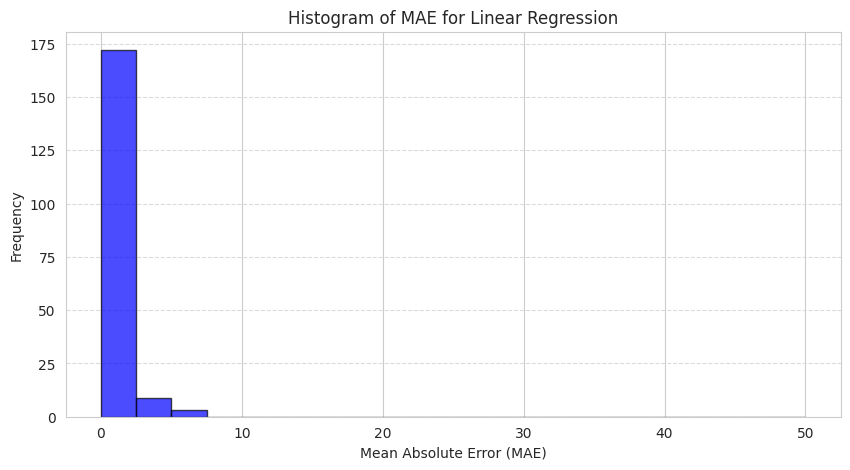

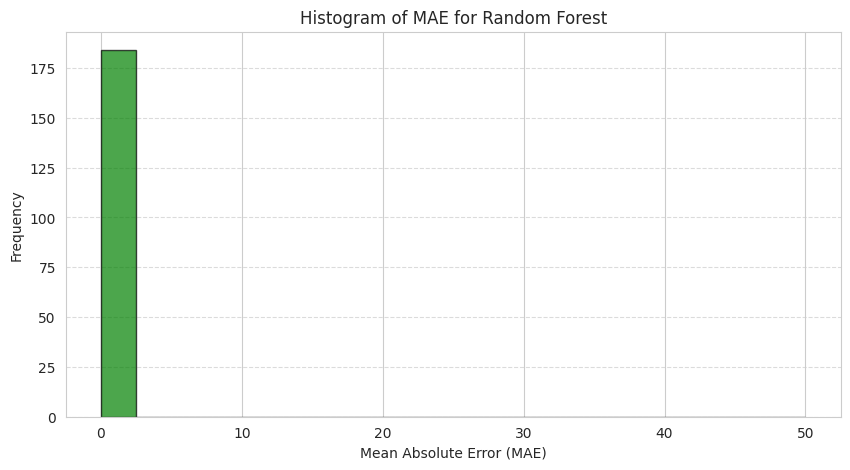

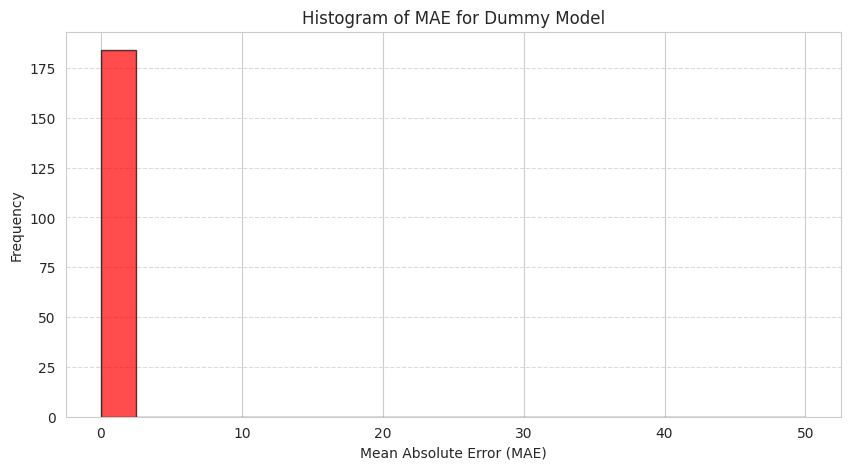

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # This creates 20 bins from 0 to 50

# Plot histograms for each model using the same bins
# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=bins, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=bins, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=bins, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



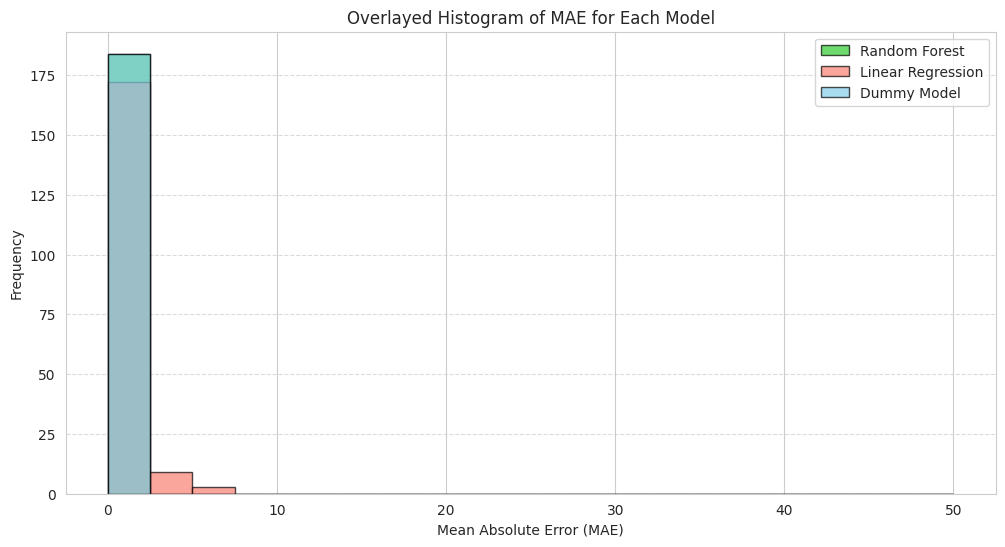

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # Adjust these values based on your data

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each histogram with the same alpha for uniform appearance
# Order of plotting affects which histogram appears on top; adjust as needed

plt.hist(mae_data["Random Forest"], bins=bins, color='limegreen', alpha=0.7, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=bins, color='salmon', alpha=0.7, label="Linear Regression", edgecolor="black")
plt.hist(mae_data["Dummy Model"], bins=bins, color='skyblue', alpha=0.7, label="Dummy Model", edgecolor="black")
# Add labels and title
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram of MAE for Each Model")

# Add legend to identify each model
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
####################################
#
#         Rush touchdown
#
#####################################

import pandas as pd

# Assuming you've already loaded your dataframes as shown previously

# Calculate the mean MAE for each model
# Changed 'MAE' to 'Mean Absolute Error' for the Dummy Model
mean_mae = {
    model: df["rush_td_per_game MAE"].mean() #if model != "Dummy Model" else df["Mean Absolute Error"].mean()
    for model, df in dataframes.items()
}

# Display the mean MAE for each model
mean_mae

{'Linear Regression': np.float64(0.30066145199737415),
 'Random Forest': np.float64(0.15892898239996348),
 'Dummy Model': np.float64(0.18052209843069789)}

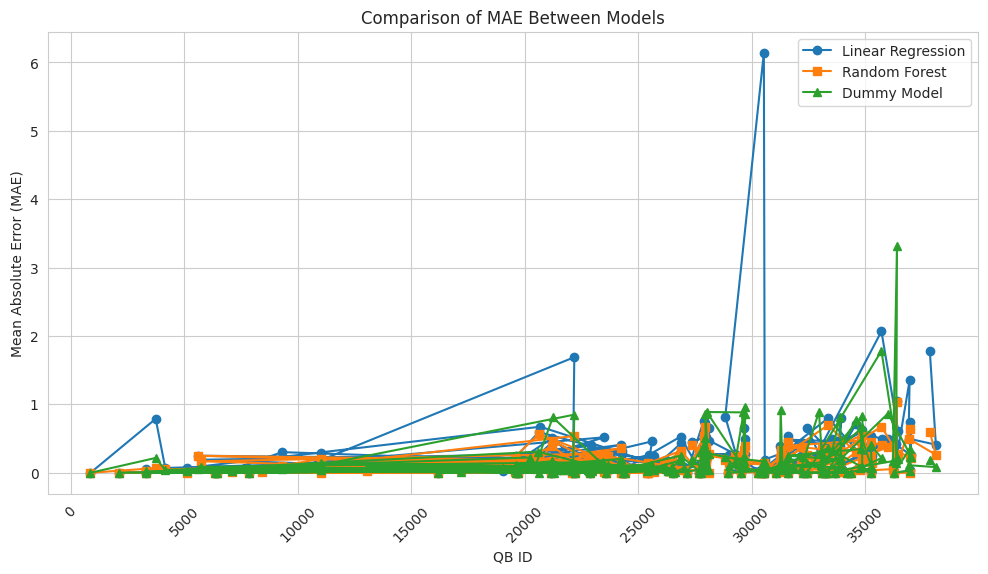

In [ ]:
import matplotlib.pyplot as plt

# Extract QB IDs and MAE values
mae_data = pd.DataFrame({
    "QB ID": dataframes["Linear Regression"]["QB ID"],
    "Linear Regression": dataframes["Linear Regression"]["rush_td_per_game MAE"],
    "Random Forest": dataframes["Random Forest"]["rush_td_per_game MAE"],
    "Dummy Model": dataframes["Dummy Model"]["rush_td_per_game MAE"],
})

# Plot the MAE values for each model
plt.figure(figsize=(12, 6))
plt.plot(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", marker='o', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", marker='s', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", marker='^', linestyle='-')

plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Between Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


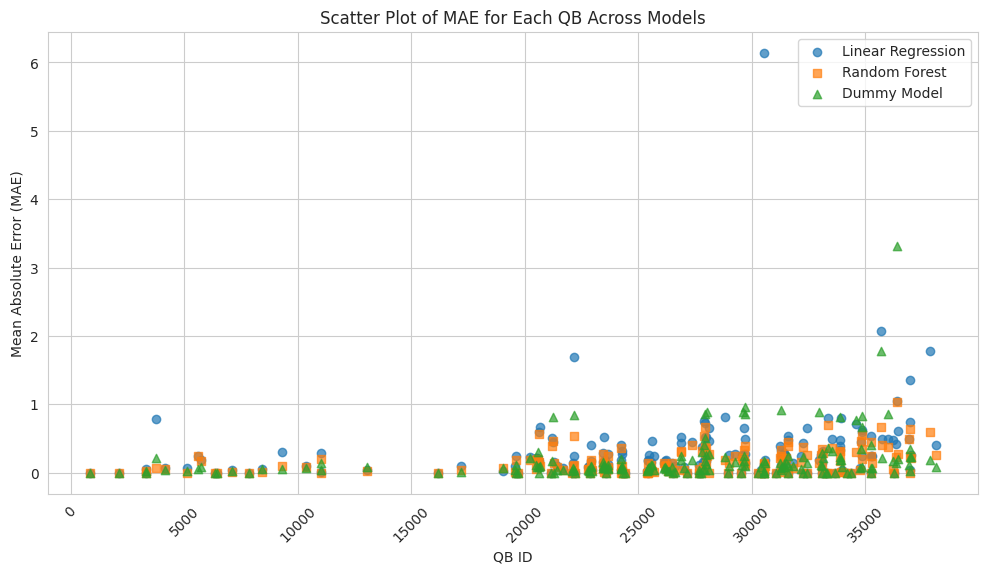

In [ ]:
# Create a scatter plot for MAE comparison
plt.figure(figsize=(12, 6))

plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", alpha=0.7, marker='o')
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", alpha=0.7, marker='s')
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", alpha=0.7, marker='^')

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


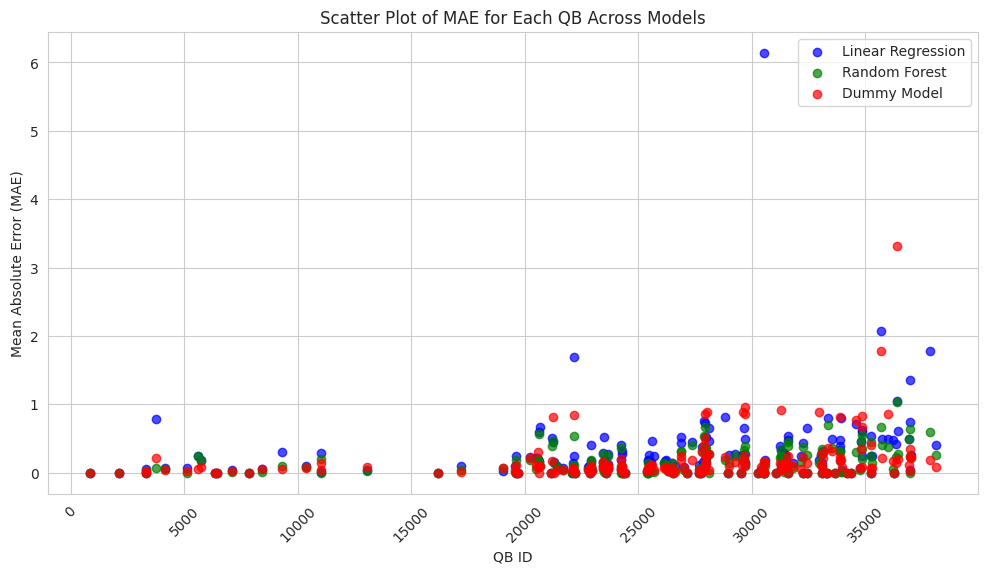

In [ ]:
# Create a scatter plot for MAE comparison with different colors
plt.figure(figsize=(12, 6))

# Define colors for each model
colors = {"Linear Regression": "blue", "Random Forest": "green", "Dummy Model": "red"}

# Scatter plot with different colored dots
plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], color=colors["Linear Regression"], alpha=0.7, marker='o', label="Linear Regression")
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], color=colors["Random Forest"], alpha=0.7, marker='o', label="Random Forest")
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], color=colors["Dummy Model"], alpha=0.7, marker='o', label="Dummy Model")

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

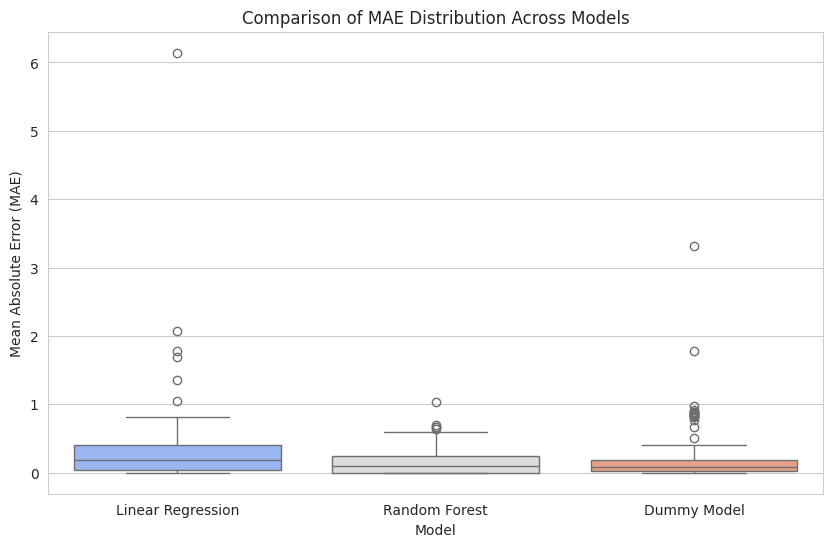

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Convert data to long format for seaborn
mae_long = mae_data.melt(id_vars=["QB ID"], var_name="Model", value_name="MAE")

# Create a boxplot to visualize the distribution of MAE across models (Fixed Version)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mae_long, x="Model", y="MAE", hue="Model", palette="coolwarm")
#plt.legend().remove()  # Remove duplicate legend

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Distribution Across Models")

plt.show()


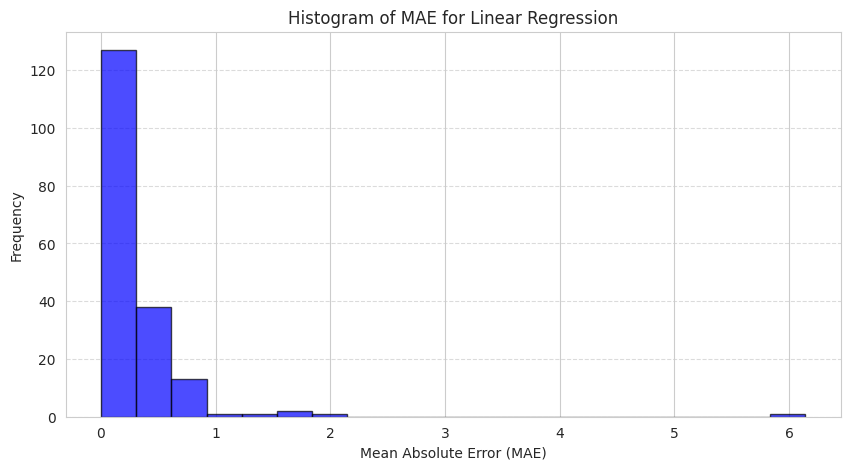

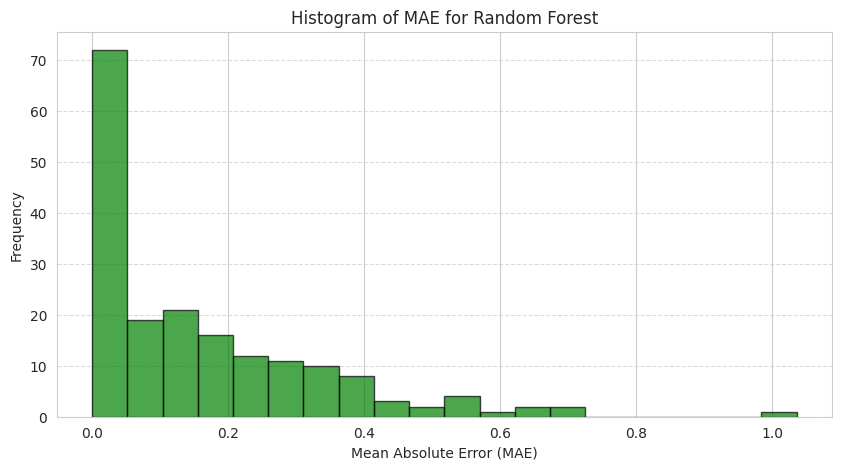

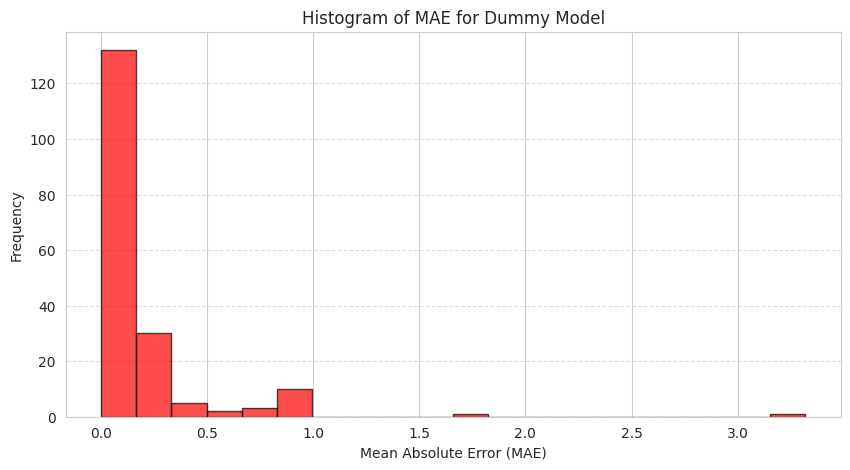

In [ ]:
# Create individual histograms for each model

# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=20, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=20, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=20, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


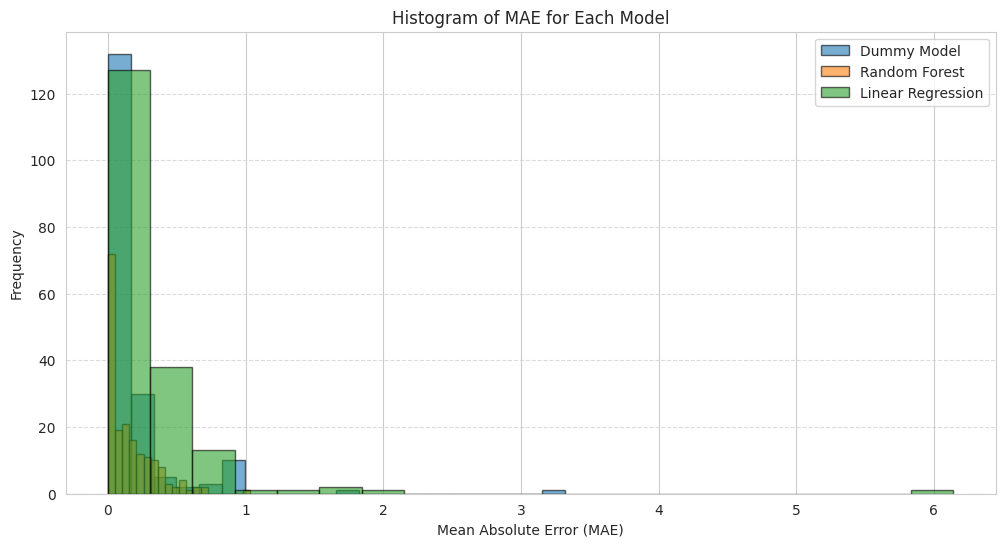

In [ ]:
# Plot individual histograms for each model's MAE distribution
plt.figure(figsize=(12, 6))

# Histogram for each model separately
plt.hist(mae_data["Dummy Model"], bins=20, alpha=0.6, label="Dummy Model", edgecolor="black")
plt.hist(mae_data["Random Forest"], bins=20, alpha=0.6, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=20, alpha=0.6, label="Linear Regression", edgecolor="black")

# Formatting
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Each Model")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


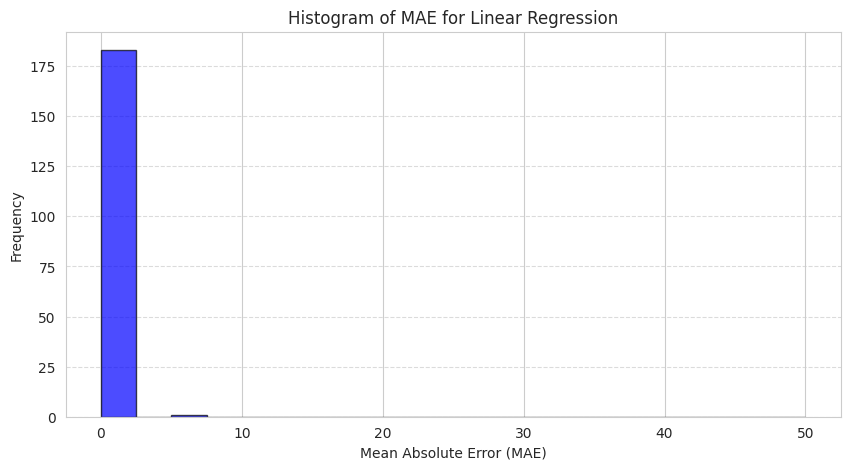

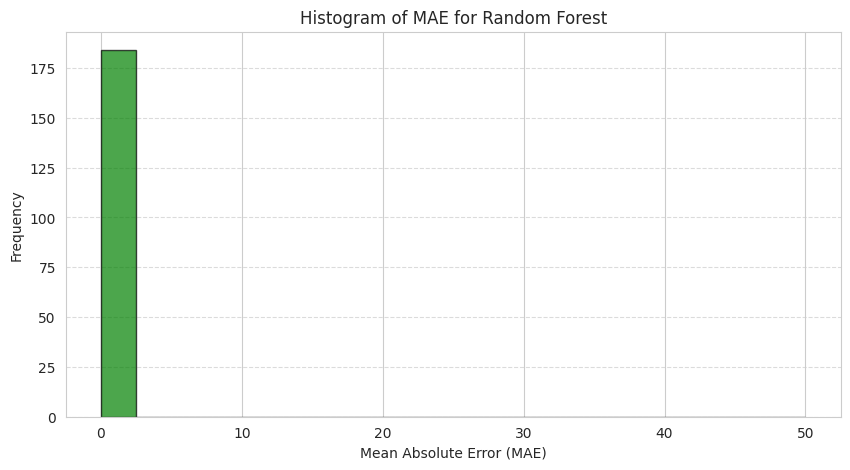

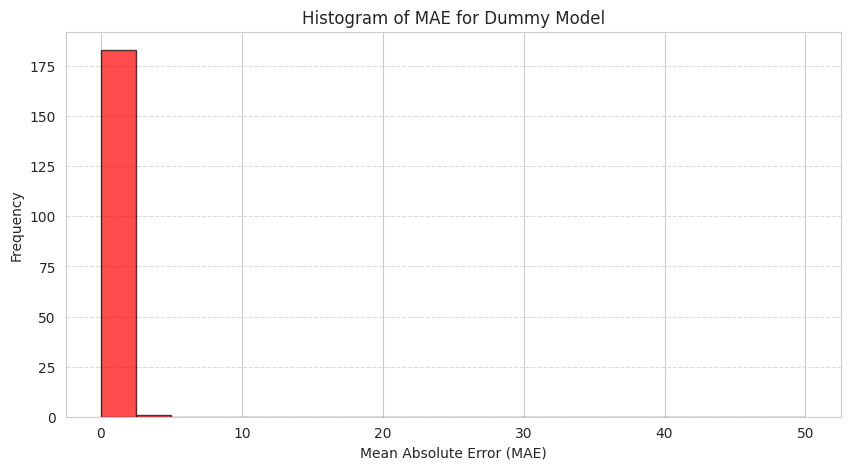

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # This creates 20 bins from 0 to 50

# Plot histograms for each model using the same bins
# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=bins, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=bins, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=bins, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



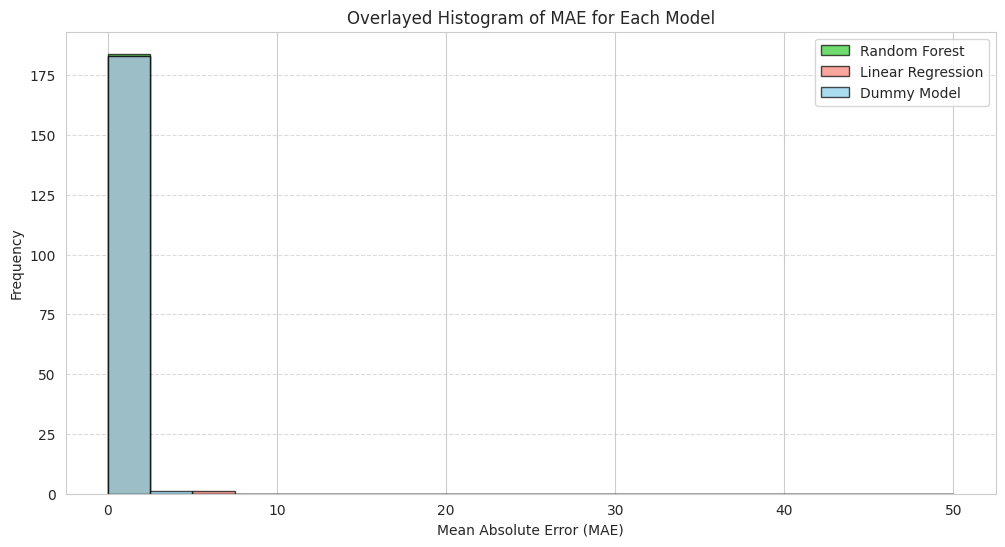

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # Adjust these values based on your data

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each histogram with the same alpha for uniform appearance
# Order of plotting affects which histogram appears on top; adjust as needed

plt.hist(mae_data["Random Forest"], bins=bins, color='limegreen', alpha=0.7, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=bins, color='salmon', alpha=0.7, label="Linear Regression", edgecolor="black")
plt.hist(mae_data["Dummy Model"], bins=bins, color='skyblue', alpha=0.7, label="Dummy Model", edgecolor="black")
# Add labels and title
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram of MAE for Each Model")

# Add legend to identify each model
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
####################################
#
#         Total touchdown
#
#####################################

import pandas as pd

# Assuming you've already loaded your dataframes as shown previously

# Calculate the mean MAE for each model
# Changed 'MAE' to 'Mean Absolute Error' for the Dummy Model
mean_mae = {
    model: df["total_td_per_game MAE"].mean() #if model != "Dummy Model" else df["Mean Absolute Error"].mean()
    for model, df in dataframes.items()
}

# Display the mean MAE for each model
mean_mae

{'Linear Regression': np.float64(1.4504488734449166),
 'Random Forest': np.float64(0.8978635274491006),
 'Dummy Model': np.float64(0.9548648012193494)}

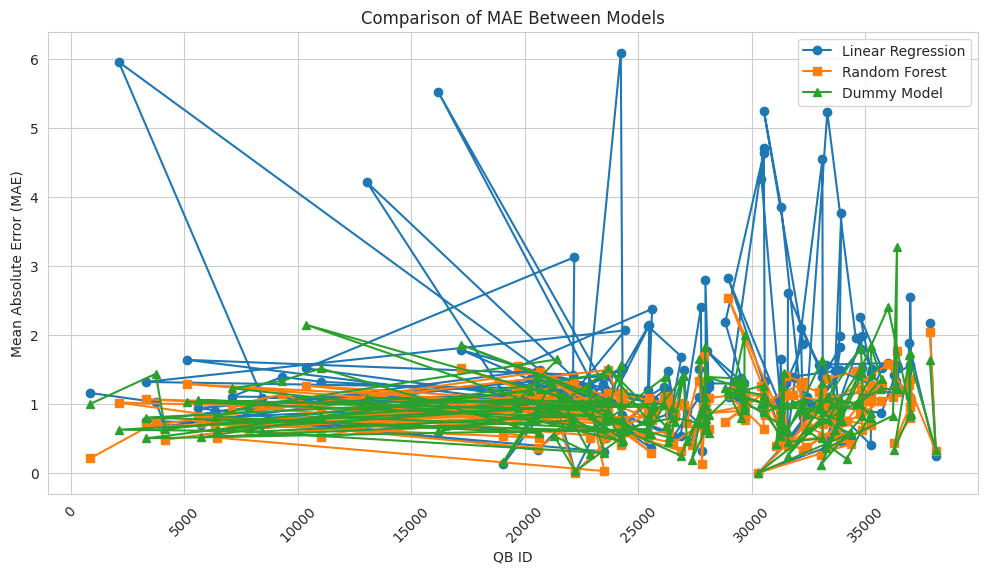

In [ ]:
import matplotlib.pyplot as plt

# Extract QB IDs and MAE values
mae_data = pd.DataFrame({
    "QB ID": dataframes["Linear Regression"]["QB ID"],
    "Linear Regression": dataframes["Linear Regression"]["total_td_per_game MAE"],
    "Random Forest": dataframes["Random Forest"]["total_td_per_game MAE"],
    "Dummy Model": dataframes["Dummy Model"]["total_td_per_game MAE"],
})

# Plot the MAE values for each model
plt.figure(figsize=(12, 6))
plt.plot(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", marker='o', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", marker='s', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", marker='^', linestyle='-')

plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Between Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


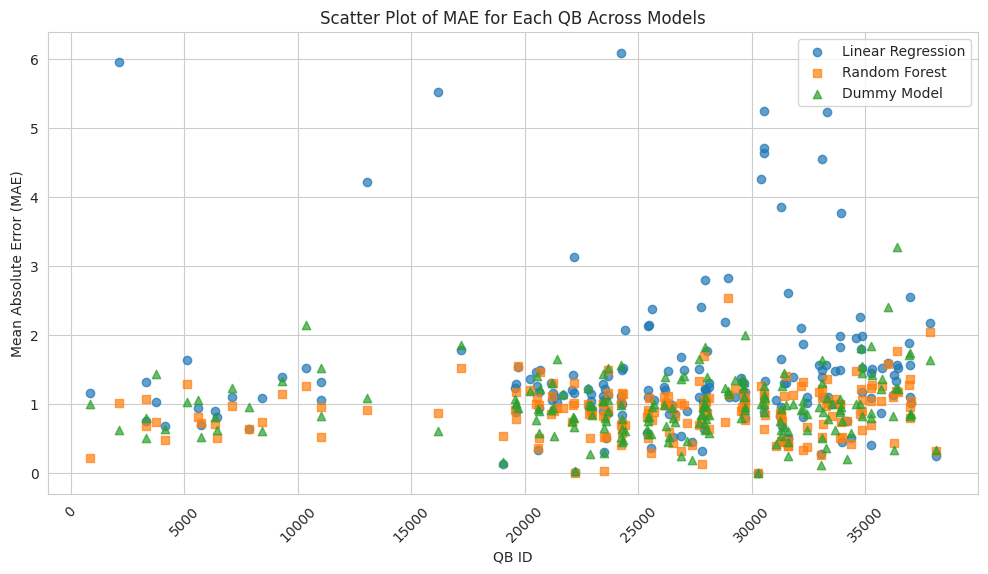

In [ ]:
# Create a scatter plot for MAE comparison
plt.figure(figsize=(12, 6))

plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", alpha=0.7, marker='o')
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", alpha=0.7, marker='s')
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", alpha=0.7, marker='^')

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


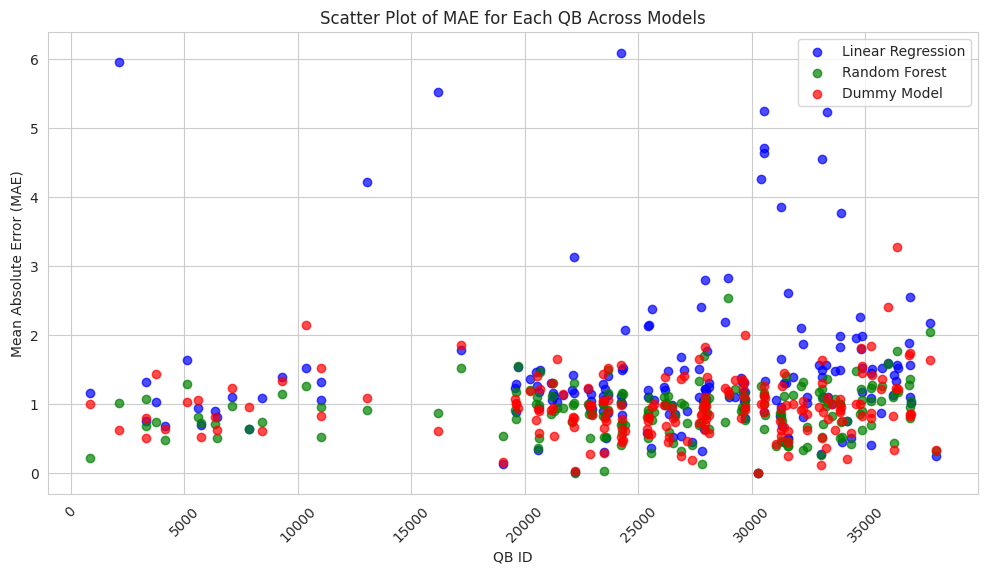

In [ ]:
# Create a scatter plot for MAE comparison with different colors
plt.figure(figsize=(12, 6))

# Define colors for each model
colors = {"Linear Regression": "blue", "Random Forest": "green", "Dummy Model": "red"}

# Scatter plot with different colored dots
plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], color=colors["Linear Regression"], alpha=0.7, marker='o', label="Linear Regression")
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], color=colors["Random Forest"], alpha=0.7, marker='o', label="Random Forest")
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], color=colors["Dummy Model"], alpha=0.7, marker='o', label="Dummy Model")

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

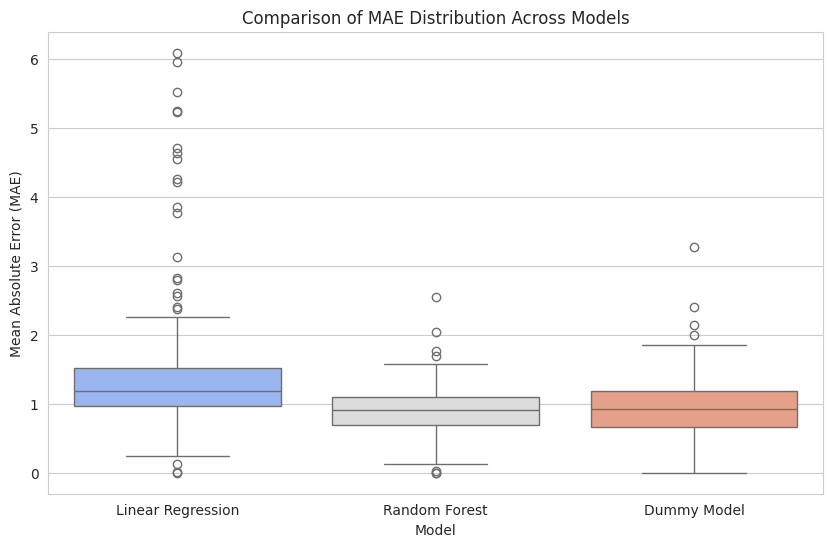

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Convert data to long format for seaborn
mae_long = mae_data.melt(id_vars=["QB ID"], var_name="Model", value_name="MAE")

# Create a boxplot to visualize the distribution of MAE across models (Fixed Version)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mae_long, x="Model", y="MAE", hue="Model", palette="coolwarm")
#plt.legend().remove()  # Remove duplicate legend

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Distribution Across Models")

plt.show()


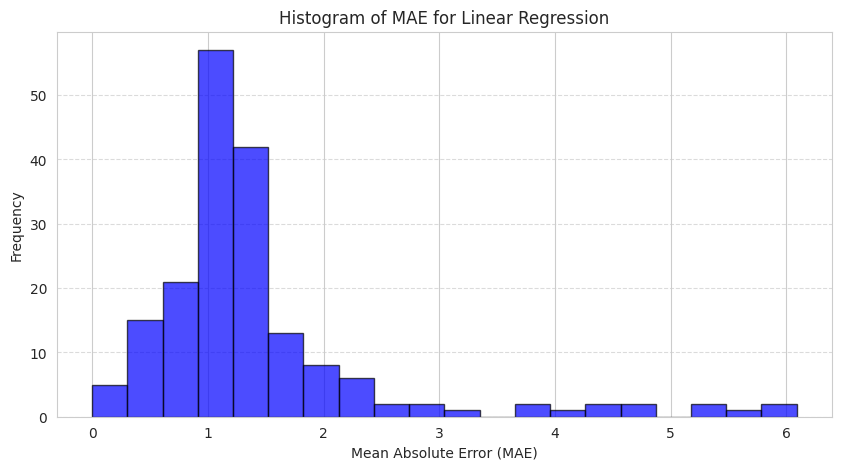

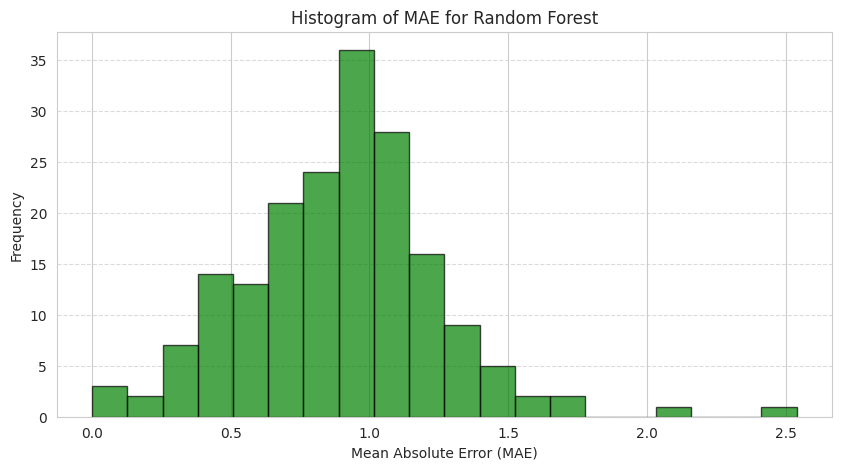

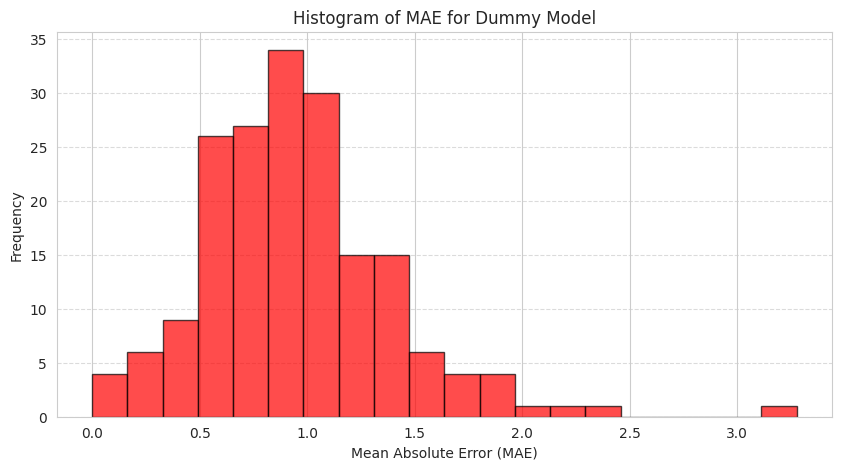

In [ ]:
# Create individual histograms for each model

# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=20, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=20, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=20, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


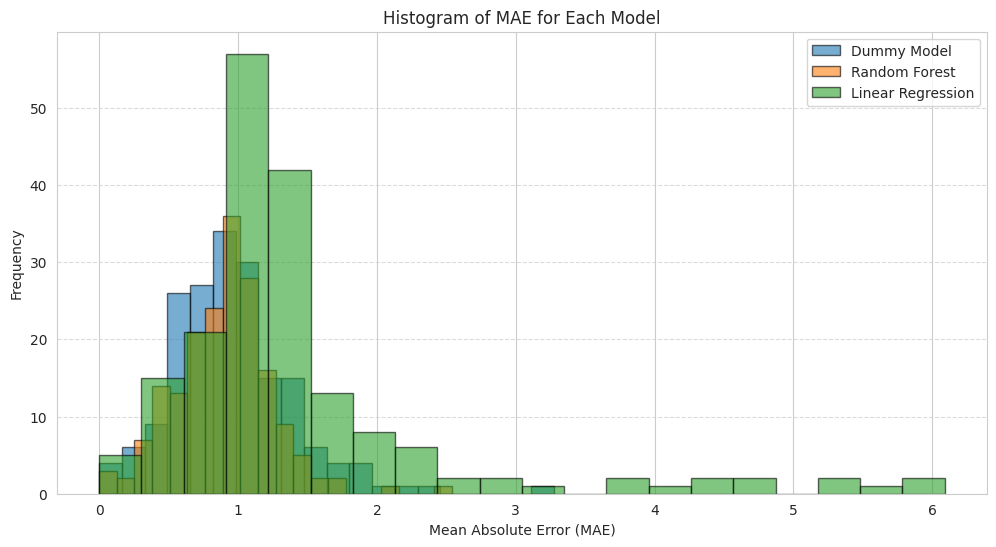

In [ ]:
# Plot individual histograms for each model's MAE distribution
plt.figure(figsize=(12, 6))

# Histogram for each model separately
plt.hist(mae_data["Dummy Model"], bins=20, alpha=0.6, label="Dummy Model", edgecolor="black")
plt.hist(mae_data["Random Forest"], bins=20, alpha=0.6, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=20, alpha=0.6, label="Linear Regression", edgecolor="black")

# Formatting
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Each Model")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


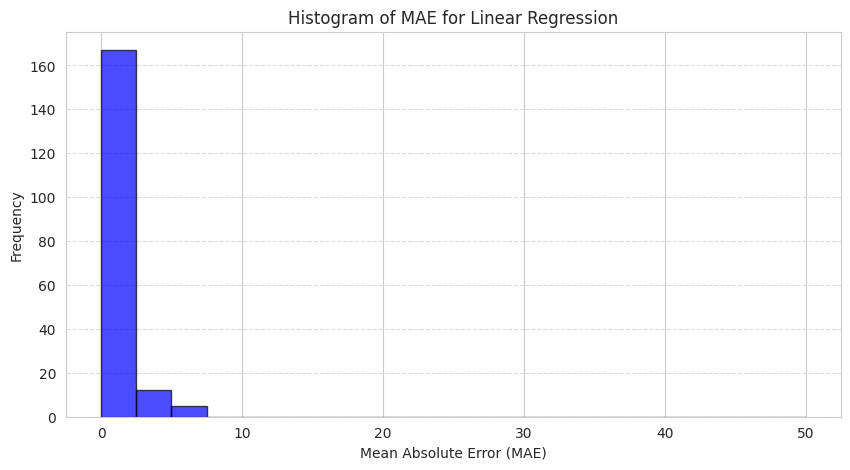

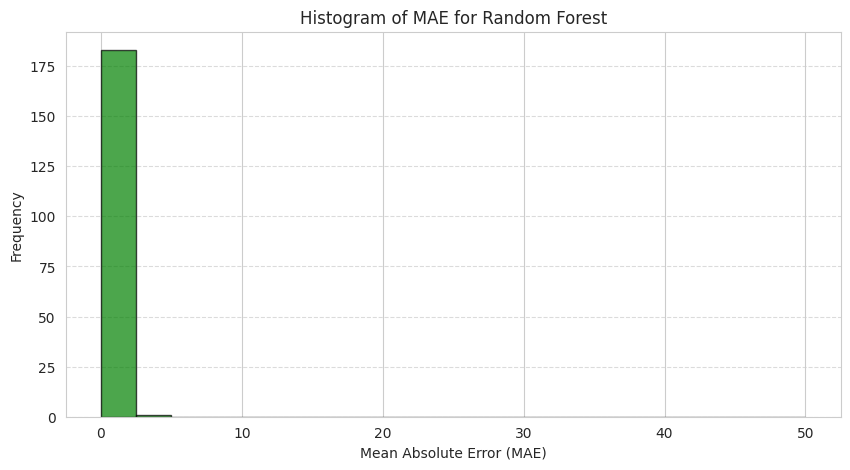

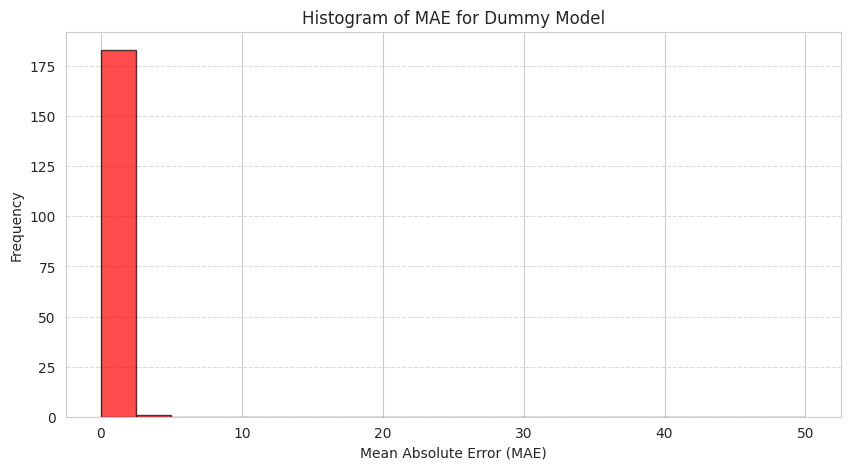

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # This creates 20 bins from 0 to 50

# Plot histograms for each model using the same bins
# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=bins, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=bins, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=bins, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



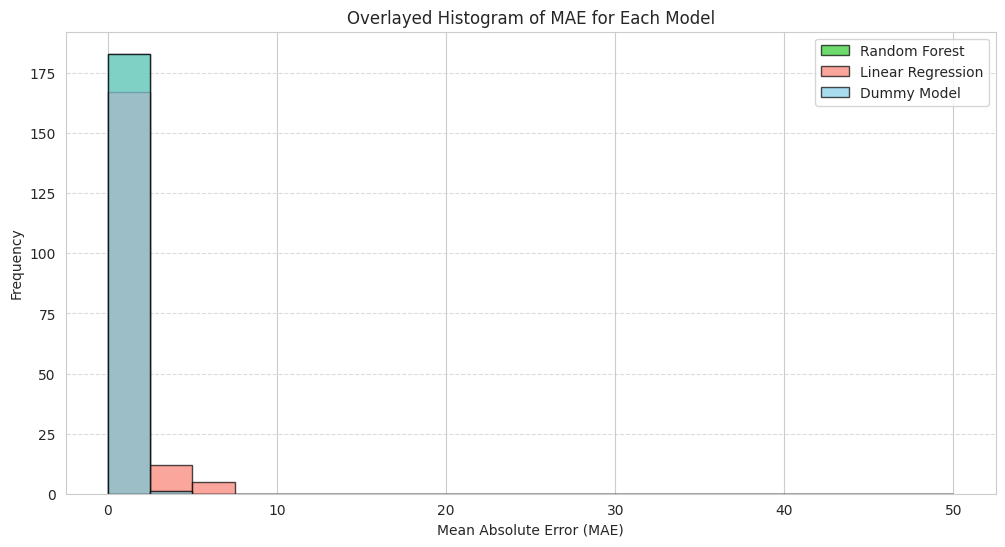

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # Adjust these values based on your data

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each histogram with the same alpha for uniform appearance
# Order of plotting affects which histogram appears on top; adjust as needed

plt.hist(mae_data["Random Forest"], bins=bins, color='limegreen', alpha=0.7, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=bins, color='salmon', alpha=0.7, label="Linear Regression", edgecolor="black")
plt.hist(mae_data["Dummy Model"], bins=bins, color='skyblue', alpha=0.7, label="Dummy Model", edgecolor="black")
# Add labels and title
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram of MAE for Each Model")

# Add legend to identify each model
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
